# 1. Data

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


100%|██████████| 9912422/9912422 [00:00<00:00, 107583396.72it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 84532933.58it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29652030.77it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1554891.35it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]
print(y)

tensor(7)


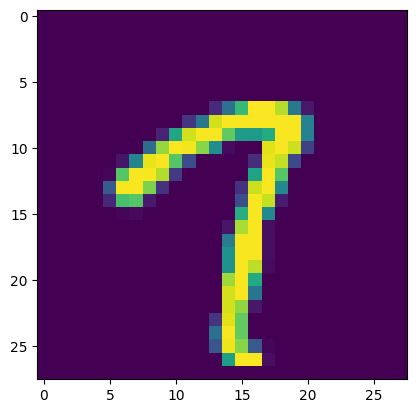

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, Ys = data
  for y in Ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Percentage distribution

In [ ]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


# 2. Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


# 3. Train

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCH = 3
n_total_step = len(trainset)

for epoch in range(EPOCH):
  for i, (images, labels) in enumerate(trainset):

    images = images.reshape(-1, 28*28)
    output = net(images)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 1000 == 0:
      print(f'Epoch [{epoch+1}/{n_total_step}], Loss: {loss.item():.4f}')

Epoch [1/6000], Loss: 0.0272
Epoch [1/6000], Loss: 0.0327
Epoch [1/6000], Loss: 0.2276
Epoch [1/6000], Loss: 0.0127
Epoch [1/6000], Loss: 0.0046
Epoch [1/6000], Loss: 0.0393
Epoch [2/6000], Loss: 0.0592
Epoch [2/6000], Loss: 0.0211
Epoch [2/6000], Loss: 0.0470
Epoch [2/6000], Loss: 0.0051
Epoch [2/6000], Loss: 0.0019
Epoch [2/6000], Loss: 0.2755
Epoch [3/6000], Loss: 0.0142
Epoch [3/6000], Loss: 0.0016
Epoch [3/6000], Loss: 0.1316
Epoch [3/6000], Loss: 0.6653
Epoch [3/6000], Loss: 0.0903
Epoch [3/6000], Loss: 0.0017


# 4. Test

In [ ]:
correct = 0
total = 0

with torch.no_grad():

  for data in testset:
    images, labels = data
    images = images.reshape(-1, 28*28)

    outputs = net(images)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the test images: {100 * correct // total} %')
print(f'{correct}, {total}')

Accuracy of the test images: 97 %
9703, 10000
